In [1]:
import sys
sys.path.append('/home/599/dbi599/unseen/unseen')

import matplotlib.pyplot as plt

import fileio

In [2]:
awap_file = '/g/data/xv83/dbi599/pr_awap_1900-2019_A-DEC-sum_wheat-sheep-sum.zarr.zip'

In [3]:
cafe_file = '/g/data/xv83/dbi599/pr_cafe-c5-d60-pX-f6_19900501-19931101_A-DEC-sum_wheat-sheep-sum.zarr.zip'

In [4]:
awap_ds = fileio.open_file(awap_file)

In [5]:
awap_ds

<xarray.Dataset>
Dimensions:  (region: 3, time: 120)
Coordinates:
  * region   (region) object 'south-west' 'south-east' 'north-east'
  * time     (time) object 1900-01-01 00:00:00 ... 2019-01-01 00:00:00
Data variables:
    pr       (time, region) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
Attributes:
    history:  Thu Jul 22 16:18:53 2021: /g/data/e14/dbi599/miniconda3/envs/un...

In [6]:
awap_ds['pr']

<xarray.DataArray 'pr' (time: 120, region: 3)>
dask.array<open_dataset-f5bd5522dee5ea61fe62a1a5e49a0ebapr, shape=(120, 3), dtype=float64, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * region   (region) object 'south-west' 'south-east' 'north-east'
  * time     (time) object 1900-01-01 00:00:00 ... 2019-01-01 00:00:00
Attributes:
    ancillary_variables:  rain_rmse_month
    cell_methods:         time: sum
    comment:              For rainfall, the base monthly data and the spatial...
    grid_mapping:         crs
    long_name:            monthly rainfall total
    standard_name:        lwe_thickness_of_precipitation_amount
    units:                mm
    valid_max:            1000
    valid_min:            0

TODO: Change long name and standard name.

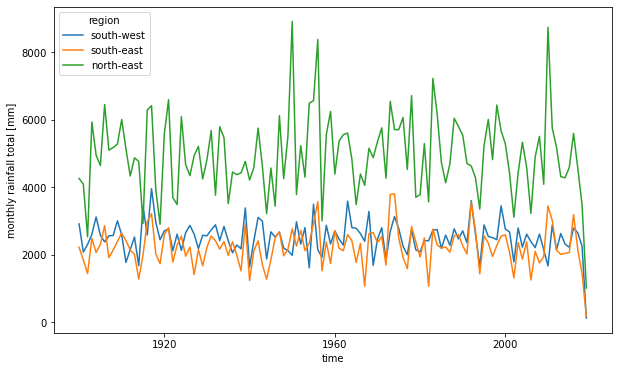

In [11]:
fig = plt.figure(figsize=[10, 6])

awap_ds['pr'].plot(hue='region')

plt.show()

TODO: Check if the final timestep has less than a full year of data.

In [12]:
cafe_ds = fileio.open_file(cafe_file)

In [15]:
cafe_ds

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 8, lead_time: 11, region: 3)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1990-05-16 00:00:00 ... 1993-11-16 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8 9 10
  * region     (region) object 'south-west' 'south-east' 'north-east'
    time       (lead_time, init_date) object dask.array<chunksize=(11, 8), meta=np.ndarray>
Data variables:
    pr         (init_date, lead_time, region, ensemble) float32 dask.array<chunksize=(1, 11, 1, 96), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_month.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Thu Jul 22 16:19:31 2021: /g/data/e14/dbi599/miniconda3/envs/...
    title:      AccessOcean-AM2

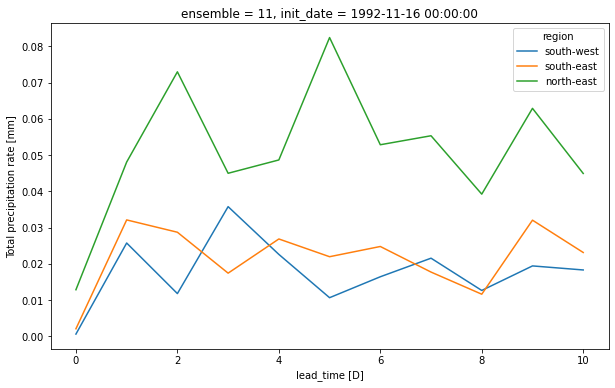

In [21]:
fig = plt.figure(figsize=[10, 6])

cafe_ds.isel(ensemble=10, init_date=5)['pr'].plot(hue='region')

plt.show()

TODO: So these units did need to be multiplied by 86400...